In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import ascent

from theano import tensor as T, function
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# Input image and filter

numpy.ndarray

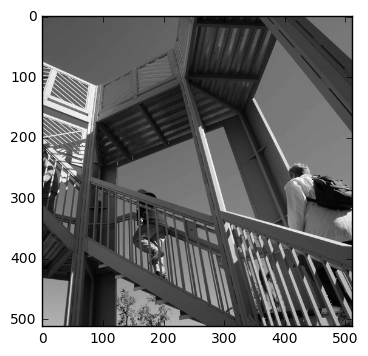

In [24]:
img = ascent()
plt.imshow(img, cmap='gray')

I = img.reshape((1, 1, img.shape[0], img.shape[1]))
type(img)

In [15]:
# Try a border detection filter
w_1 = [[0., 0., 0., 0., 0.],
      [0., 0., 1., 0., 0.],
      [0., 1., 4., 1., 0.],
      [0., 0., 1., 0., 0.],
      [0., 0., 0., 0., 0.]]
w_1 = np.asarray(w_1).reshape((1, 1, 5, 5)) # dimensions: (input channels, output channels, rows, columns)
w_2 = np.random.randn(1, 1, 5, 5) # try a random filter

w_3 = [[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]

w_3 = np.asarray(w_3).reshape((1, 1, 11, 11))
w_4 = np.random.randn(1, 1, 11, 11) # try a random filter

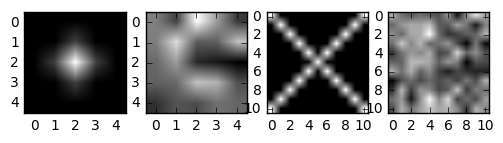

In [16]:
plt.subplot(141)
plt.imshow(w_1[0, 0], cmap='gray')

plt.subplot(142)
plt.imshow(w_2[0, 0], cmap='gray')

plt.subplot(143)
plt.imshow(w_3[0, 0], cmap='gray')

plt.subplot(144)
plt.imshow(w_4[0, 0], cmap='gray')

# Theano convolution

In [17]:
X, W = T.tensor4s('X', 'W')
Y_1 = T.nnet.conv.conv2d(X, W, border_mode='valid', image_shape=I[:1].shape, filter_shape=w_1.shape)
F_1 = function([X, W], Y_1, allow_input_downcast=True)

Y_2 = T.nnet.conv.conv2d(X, W, border_mode='valid', image_shape=I[:1].shape, filter_shape=w_3.shape)
F_2 = function([X, W], Y_2, allow_input_downcast=True)

In [18]:
I.shape

(1L, 1L, 512L, 512L)

(512L, 512L)
(1L, 1L, 508L, 508L)
(1L, 1L, 508L, 508L)


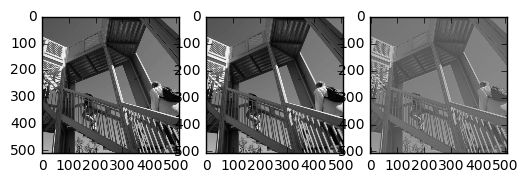

In [19]:
out_1 = F_1(I, w_1)
out_2 = F_1(I, w_2)

print(img.shape)
print(out_1.shape)
print(out_2.shape)

plt.subplot(131)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.imshow(out_1[0, 0], cmap='gray')

plt.subplot(133)
plt.imshow(out_2[0, 0], cmap='gray')

(512L, 512L)
(1L, 1L, 502L, 502L)
(1L, 1L, 502L, 502L)


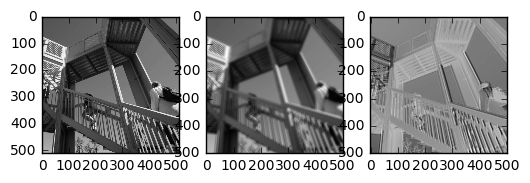

In [20]:
out_3 = F_2(I, w_3)
out_4 = F_2(I, w_4)

print(img.shape)
print(out_3.shape)
print(out_4.shape)

plt.subplot(131)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.imshow(out_3[0, 0], cmap='gray')

plt.subplot(133)
plt.imshow(out_4[0, 0], cmap='gray')

# Keras convolution

In [21]:
nb_output_chan = 1
nb_rows = 5
nb_cols = 5
pool_row = 8
pool_col = 8

model = Sequential()
model.add(Convolution2D(nb_output_chan, nb_rows, nb_cols, border_mode='valid', input_shape=I.shape[1:]))
model.add(MaxPooling2D(pool_size=(pool_row, pool_col)))

model.compile(loss='mse', optimizer='sgd')

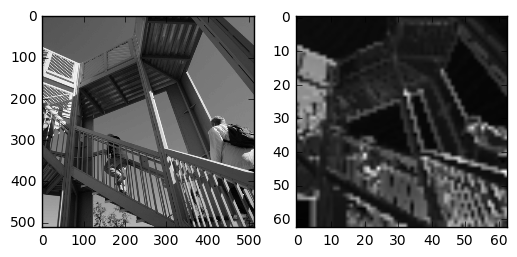

In [23]:
out = model.predict(I)

plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.imshow(out[0, 0], cmap='gray')